**Setuping the Python Environment**

In [ ]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

**Loading and Exploring the Dataset**

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Feature Engineering**

In [6]:
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

In [8]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']]
features.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


**Determine** **Optimal** **Number** **of** **Clusters** (**Elbow** **Method**)



In [9]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

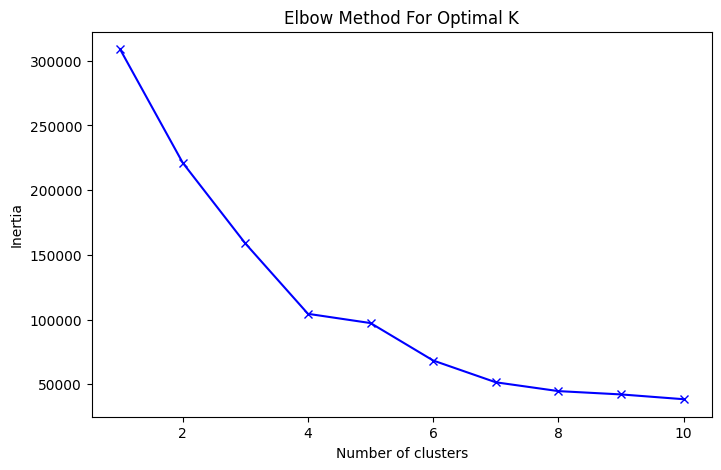

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

**Performing K-Means Clustering**

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded,Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,0


**Visualizing the Clusters**

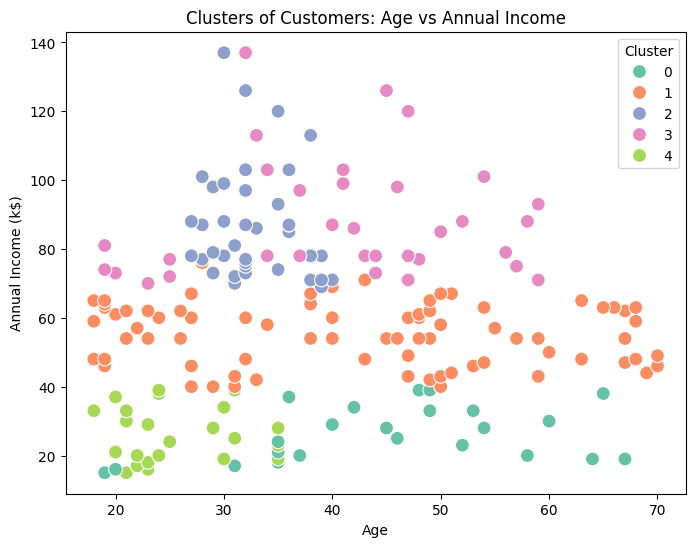

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set2', s=100)
plt.title('Clusters of Customers: Age vs Annual Income')
plt.show()

**Analyzing Cluster**

In [14]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Gender_Encoded             int64
Cluster                    int32
dtype: object


In [17]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Encoded']
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100),Gender_Encoded
Cluster,,,,
0,45.217391,26.304348,20.913043,0.391304
1,43.088608,55.291139,49.569620,0.417722
2,32.692308,86.538462,82.128205,0.461538
3,40.666667,87.750000,17.583333,0.527778
4,25.521739,26.304348,78.565217,0.391304


**Business Strategy Suggestions:**


*   Customers in the cluster with **high income and high spending scores** can be targeted with premium offers.
*   Customers with **low spending scores but high income** could be encouraged to spend more through special promotions or loyalty programs.
*   **Younger customers** with **lower spending scores** might benefit from offers aimed at increasing brand loyalty.